In [1]:
# Importing torch
import torch
import torch.nn as nn

In [2]:
# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get the data
The dataset is images contains six different scene including buildings, forest, glacier, mountain, sea, and street.

Data obtained from: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [3]:
# Setup path to a data folder
from pathlib import Path

data_path = Path("data/")
train_image_path = data_path / "train/seg_train/"
test_image_path = data_path / "test/seg_test/"
pred_image_path = data_path / "pred/seg_pred/"

In [4]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(train_image_path)

There are 6 directories and 0 images in 'data\train\seg_train'.
There are 0 directories and 2191 images in 'data\train\seg_train\buildings'.
There are 0 directories and 2271 images in 'data\train\seg_train\forest'.
There are 0 directories and 2404 images in 'data\train\seg_train\glacier'.
There are 0 directories and 2512 images in 'data\train\seg_train\mountain'.
There are 0 directories and 2274 images in 'data\train\seg_train\sea'.
There are 0 directories and 2382 images in 'data\train\seg_train\street'.


In [6]:
walk_through_dir(test_image_path)

There are 6 directories and 0 images in 'data\test\seg_test'.
There are 0 directories and 437 images in 'data\test\seg_test\buildings'.
There are 0 directories and 474 images in 'data\test\seg_test\forest'.
There are 0 directories and 553 images in 'data\test\seg_test\glacier'.
There are 0 directories and 525 images in 'data\test\seg_test\mountain'.
There are 0 directories and 510 images in 'data\test\seg_test\sea'.
There are 0 directories and 501 images in 'data\test\seg_test\street'.


Image class: sea
Image size: 150 x 150


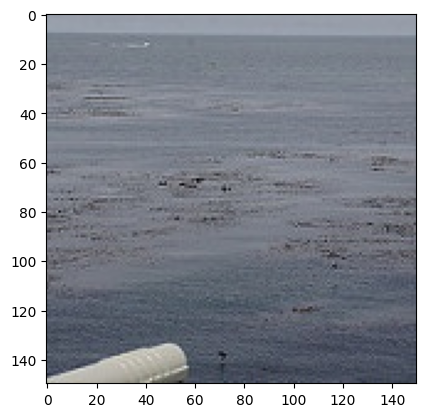

In [7]:
# Visualizing image randomly
import random
import matplotlib.pyplot as plt
from PIL import Image

image_path_list = list(train_image_path.glob("*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Image class: {image_class}")
print(f"Image size: {img.width} x {img.height}")
plt.imshow(img)
plt.show()

### Transforming data

In [8]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor()
])

In [10]:
data_transform(img)

tensor([[[0.6000, 0.6039, 0.6039,  ..., 0.5922, 0.5882, 0.5922],
         [0.5922, 0.5922, 0.5922,  ..., 0.6000, 0.6039, 0.5961],
         [0.5922, 0.5961, 0.5922,  ..., 0.5961, 0.5961, 0.6000],
         ...,
         [0.2902, 0.2941, 0.2784,  ..., 0.2863, 0.2863, 0.2980],
         [0.2667, 0.2706, 0.2706,  ..., 0.5608, 0.4235, 0.3216],
         [0.2549, 0.2471, 0.2627,  ..., 0.7490, 0.7451, 0.6980]],

        [[0.6235, 0.6275, 0.6275,  ..., 0.6157, 0.6118, 0.6157],
         [0.6157, 0.6157, 0.6157,  ..., 0.6275, 0.6275, 0.6275],
         [0.6196, 0.6196, 0.6157,  ..., 0.6314, 0.6314, 0.6314],
         ...,
         [0.3176, 0.3216, 0.3098,  ..., 0.3098, 0.3137, 0.3255],
         [0.2941, 0.2980, 0.2980,  ..., 0.5765, 0.4431, 0.3412],
         [0.2863, 0.2784, 0.2902,  ..., 0.7490, 0.7490, 0.7059]],

        [[0.6706, 0.6745, 0.6745,  ..., 0.6627, 0.6588, 0.6627],
         [0.6627, 0.6627, 0.6627,  ..., 0.6745, 0.6745, 0.6706],
         [0.6627, 0.6667, 0.6627,  ..., 0.6745, 0.6745, 0.

In [11]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
        
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

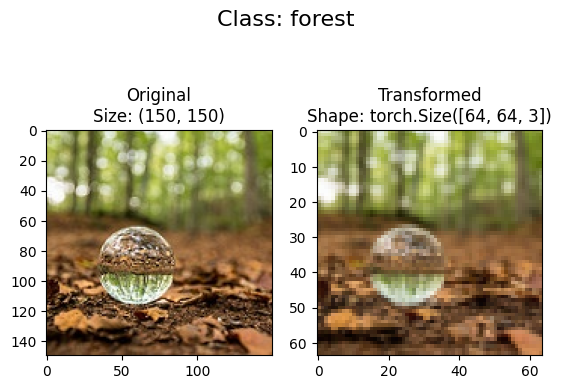

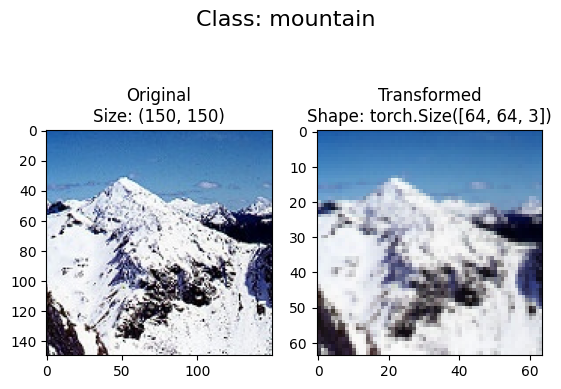

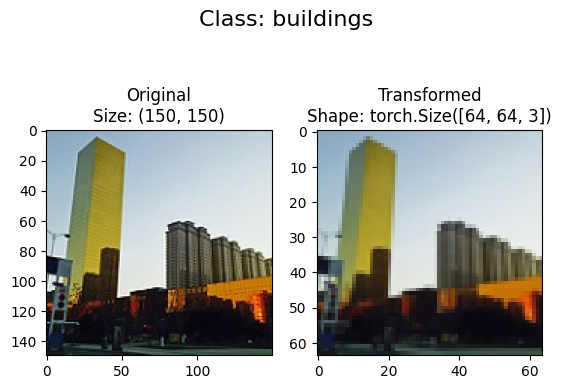

In [12]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

In [13]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_image_path,
                                  transform=data_transform,
                                  target_transform=None)

train_data

Dataset ImageFolder
    Number of datapoints: 14034
    Root location: data\train\seg_train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.3)
               ToTensor()
           )

In [14]:
train_data.class_to_idx

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [15]:
train_data.samples[0]

('data\\train\\seg_train\\buildings\\0.jpg', 0)

In [16]:
# Sample first train image
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.9686, 0.9686, 0.9725,  ..., 0.9765, 0.9725, 0.9686],
         [0.9647, 0.9686, 0.9686,  ..., 0.9765, 0.9765, 0.9686],
         [0.9686, 0.9686, 0.9686,  ..., 0.9765, 0.9765, 0.9765],
         ...,
         [0.2588, 0.2627, 0.2549,  ..., 0.3020, 0.3020, 0.2863],
         [0.2314, 0.3020, 0.2745,  ..., 0.2863, 0.2863, 0.2118],
         [0.2235, 0.3098, 0.2392,  ..., 0.1804, 0.1843, 0.1961]],

        [[0.9686, 0.9725, 0.9804,  ..., 0.9765, 0.9725, 0.9686],
         [0.9647, 0.9725, 0.9765,  ..., 0.9765, 0.9765, 0.9686],
         [0.9725, 0.9725, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
         ...,
         [0.2510, 0.2510, 0.2471,  ..., 0.2824, 0.2824, 0.2667],
         [0.2275, 0.2980, 0.2706,  ..., 0.2667, 0.2667, 0.1922],
         [0.2196, 0.3059, 0.2353,  ..., 0.1608, 0.1647, 0.1765]],

        [[0.9608, 0.9647, 0.9686,  ..., 0.9765, 0.9725, 0.9647],
         [0.9569, 0.9608, 0.9647,  ..., 0.9765, 0.9765, 0.9647],
         [0.9608, 0.9647, 0.9647,  ..., 0.9

In [89]:
# Transform both train and test dataset
train_data_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.RandomHorizontalFlip(p=0.4),
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.ToTensor()
])

In [90]:
train_data = datasets.ImageFolder(root=train_image_path,
                                  transform=train_data_transform)
test_data = datasets.ImageFolder(root=test_image_path,
                                 transform=test_data_transform)

In [91]:
# Turn train and test datasets into DataLoader
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2997f93b210>,
 <torch.utils.data.dataloader.DataLoader at 0x2994f63b4d0>)

In [92]:
class_names = train_data.classes
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

### Create model

In [97]:
# Baseline model
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2),
            nn.Flatten()
        )
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=15376, # this can be found during test with error
                      out_features=hidden_units),
            nn.ReLU()
        )
        self.fc2 = nn.Linear(in_features=hidden_units,
                             out_features=output_shape)

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.fc1(x)
        # print(x.shape)
        output = self.fc2(x)
        # print(output.shape)
        return output

In [98]:
torch.manual_seed(42)
baseline_model = CNNModel(input_shape=3,
                          hidden_units=16,
                          output_shape=len(class_names)).to(device)

baseline_model

CNNModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (fc1): Sequential(
    (0): Linear(in_features=15376, out_features=16, bias=True)
    (1): ReLU()
  )
  (fc2): Linear(in_features=16, out_features=6, bias=True)
)

In [99]:
# Try a forward pass on a single image (to find the error shape)
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [100]:
# Try a forward pass
baseline_model(image_batch.to(device))

tensor([[-0.2063, -0.1305, -0.0920, -0.0800,  0.1234, -0.1915],
        [-0.2090, -0.1274, -0.0940, -0.0752,  0.1240, -0.1888],
        [-0.2051, -0.1302, -0.0909, -0.0703,  0.1312, -0.1883],
        [-0.2054, -0.1239, -0.0943, -0.0680,  0.1307, -0.1927],
        [-0.2057, -0.1141, -0.0915, -0.0600,  0.1236, -0.1907],
        [-0.2108, -0.1344, -0.0885, -0.0767,  0.1283, -0.1925],
        [-0.1983, -0.1207, -0.0925, -0.0788,  0.1244, -0.1923],
        [-0.1920, -0.1147, -0.1017, -0.0741,  0.1171, -0.1862],
        [-0.1893, -0.1171, -0.0986, -0.0861,  0.1073, -0.1851],
        [-0.2016, -0.1185, -0.0960, -0.0800,  0.1168, -0.1913],
        [-0.1865, -0.1033, -0.1090, -0.0789,  0.1212, -0.1875],
        [-0.2018, -0.1173, -0.0876, -0.0669,  0.1294, -0.1901],
        [-0.2087, -0.1329, -0.0811, -0.0588,  0.1332, -0.1956],
        [-0.1994, -0.1251, -0.0996, -0.0730,  0.1252, -0.1866],
        [-0.2014, -0.1213, -0.0972, -0.0774,  0.1244, -0.1871],
        [-0.1894, -0.1168, -0.1028, -0.0

### Start train and test

In [101]:
# Train step
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [102]:
# Test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    model.eval()
    test_loss, test_acc = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = torch.argmax(test_pred_logits, dim=1)
            test_acc += (test_pred_labels==y).sum().item() / len(test_pred_labels)

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [103]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"Epochs: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [104]:
torch.manual_seed(42)

EPOCHS = 20

baseline_model = CNNModel(input_shape=3,
                          hidden_units=16,
                          output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=baseline_model.parameters(),
                             lr=1e-3)

from timeit import default_timer as timer
start_time = timer()

# Train model
baseline_model_results = train(model=baseline_model,
                               train_dataloader=train_dataloader,
                               test_dataloader=test_dataloader,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 1.3124 | Train acc: 0.4736 | Test loss: 1.1570 | Test acc: 0.5319
Epochs: 1 | Train loss: 1.1025 | Train acc: 0.5613 | Test loss: 1.0830 | Test acc: 0.5622
Epochs: 2 | Train loss: 1.0524 | Train acc: 0.5857 | Test loss: 1.0235 | Test acc: 0.5863
Epochs: 3 | Train loss: 1.0007 | Train acc: 0.6037 | Test loss: 0.9438 | Test acc: 0.6225
Epochs: 4 | Train loss: 0.9782 | Train acc: 0.6180 | Test loss: 0.9277 | Test acc: 0.6405
Epochs: 5 | Train loss: 0.9662 | Train acc: 0.6238 | Test loss: 0.9460 | Test acc: 0.6210
Epochs: 6 | Train loss: 0.9439 | Train acc: 0.6340 | Test loss: 0.9245 | Test acc: 0.6321
Epochs: 7 | Train loss: 0.9266 | Train acc: 0.6390 | Test loss: 0.8861 | Test acc: 0.6487
Epochs: 8 | Train loss: 0.9175 | Train acc: 0.6451 | Test loss: 0.8787 | Test acc: 0.6534
Epochs: 9 | Train loss: 0.9030 | Train acc: 0.6523 | Test loss: 0.8643 | Test acc: 0.6527
Epochs: 10 | Train loss: 0.8920 | Train acc: 0.6525 | Test loss: 0.8679 | Test acc: 0.6568
Epochs: 1

In [105]:
baseline_model_results

{'train_loss': [1.3123617491309354,
  1.1025139495289136,
  1.0523807842258983,
  1.0007081610195185,
  0.9781704834218992,
  0.9662443258224696,
  0.9439450558741707,
  0.9266239958634952,
  0.9175460248981901,
  0.9030284028933098,
  0.8920203253185559,
  0.8840015357474803,
  0.8726189132431916,
  0.8706077191987179,
  0.8561176344718369,
  0.8549590635544075,
  0.8424112707851688,
  0.8307563712765252,
  0.8211409518143039,
  0.8206720229297673],
 'train_acc': [0.4735589091369274,
  0.5612503163756011,
  0.5857298785117692,
  0.6037395596051633,
  0.6179606428752215,
  0.6238135914958239,
  0.6340404328018223,
  0.6389917109592508,
  0.6451135788407998,
  0.6523348519362187,
  0.6525325866869147,
  0.6570804859529232,
  0.6611063654770944,
  0.6643729435585928,
  0.6702417109592508,
  0.6716179448240952,
  0.6778821817261452,
  0.6782381042773981,
  0.6860684004049608,
  0.6868277018476334],
 'test_loss': [1.1569941018490082,
  1.0830125517033515,
  1.0235222413184795,
  0.94375341

In [106]:
# Plot the loss curves
def plot_loss_curves(results):
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]
    train_acc = results["train_acc"]
    test_acc = results["test_acc"]
    epochs = range(len(results["train_loss"]))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label="train_accuracy")
    plt.plot(epochs, test_acc, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

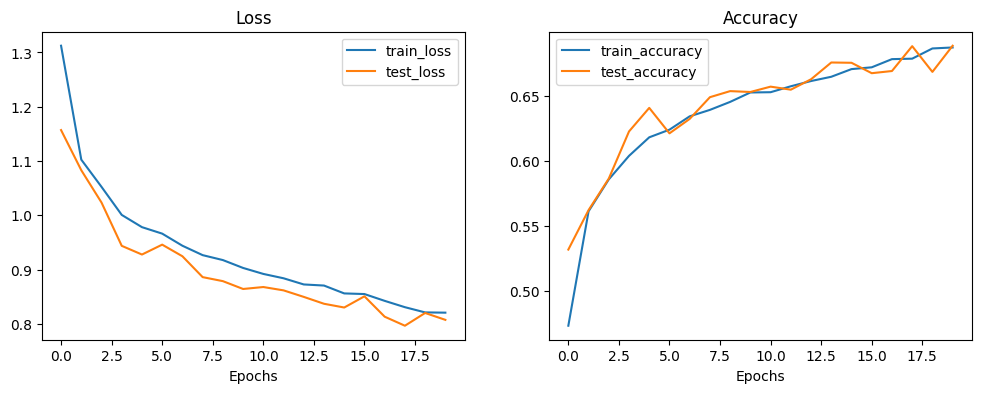

In [107]:
plot_loss_curves(baseline_model_results)

### Transfer learning

In [108]:
import torchvision

weights = torchvision.models.ResNet50_Weights.DEFAULT
resnet_model = torchvision.models.resnet50(weights=weights)

In [109]:
resnet_model.parameters

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [110]:
# Freeze all of the base layers in ResNet50
for param in resnet_model.parameters():
    param.requires_grad = False

In [111]:
# Last layer before update
resnet_model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [112]:
# Update the last layer of model
resnet_model.fc = nn.Linear(in_features=2048, out_features=len(class_names), bias=True)

In [113]:
# Last layer after update
resnet_model.fc

Linear(in_features=2048, out_features=6, bias=True)

In [114]:
# Train model
torch.manual_seed(42)

EPOCHS = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=resnet_model.parameters(),
                             lr=1e-3)

from timeit import default_timer as timer
start_time = timer()

# Train model
resnet50_model_results = train(model=resnet_model.to(device),
                               train_dataloader=train_dataloader,
                               test_dataloader=test_dataloader,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 0.6008 | Train acc: 0.8143 | Test loss: 0.3805 | Test acc: 0.8716
Epochs: 1 | Train loss: 0.4156 | Train acc: 0.8575 | Test loss: 0.3305 | Test acc: 0.8822
Epochs: 2 | Train loss: 0.3842 | Train acc: 0.8648 | Test loss: 0.3182 | Test acc: 0.8829
Epochs: 3 | Train loss: 0.3753 | Train acc: 0.8659 | Test loss: 0.2960 | Test acc: 0.8935
Epochs: 4 | Train loss: 0.3540 | Train acc: 0.8765 | Test loss: 0.3060 | Test acc: 0.8848
Epochs: 5 | Train loss: 0.3514 | Train acc: 0.8756 | Test loss: 0.2721 | Test acc: 0.9062
Epochs: 6 | Train loss: 0.3406 | Train acc: 0.8775 | Test loss: 0.2981 | Test acc: 0.8885
Epochs: 7 | Train loss: 0.3348 | Train acc: 0.8789 | Test loss: 0.2940 | Test acc: 0.8936
Epochs: 8 | Train loss: 0.3349 | Train acc: 0.8791 | Test loss: 0.2760 | Test acc: 0.9029
Epochs: 9 | Train loss: 0.3232 | Train acc: 0.8835 | Test loss: 0.2806 | Test acc: 0.8949
Epochs: 10 | Train loss: 0.3309 | Train acc: 0.8811 | Test loss: 0.2943 | Test acc: 0.8916
Epochs: 1

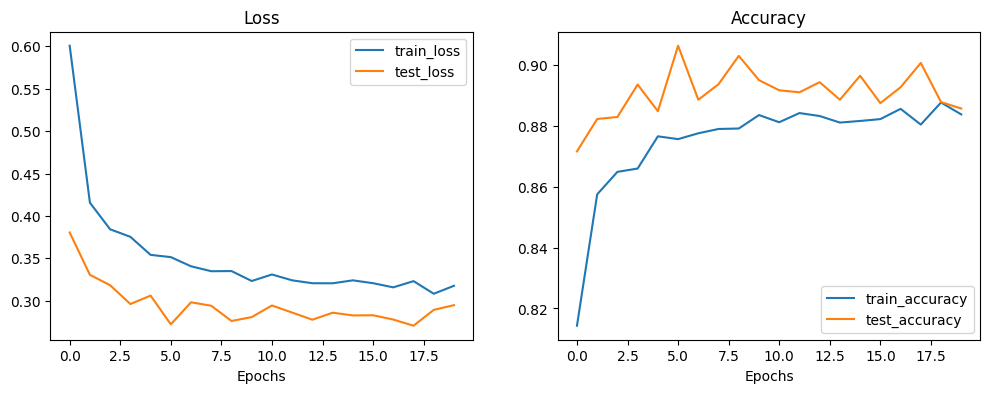

In [115]:
plot_loss_curves(resnet50_model_results)

In [117]:
# Try different model
torch.manual_seed(42)

EPOCHS = 20

# EfficientNetB5 model
effnet_weights = torchvision.models.EfficientNet_B5_Weights.DEFAULT
effnet_model = torchvision.models.efficientnet_b5(weights=effnet_weights)

for param in effnet_model.parameters():
    param.requires_grad = False

# Updating parameters
effnet_model.classifier = nn.Sequential(
    nn.Dropout(p=0.4, inplace=True),
    nn.Linear(in_features=2048, out_features=len(class_names), bias=True)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=effnet_model.parameters(),
                             lr=1e-3)

start_time = timer()

# Train model
effnet_model_results = train(model=effnet_model.to(device),
                             train_dataloader=train_dataloader,
                             test_dataloader=test_dataloader,
                             optimizer=optimizer,
                             loss_fn=loss_fn,
                             epochs=EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 0.9760 | Train acc: 0.6557 | Test loss: 0.7959 | Test acc: 0.7314
Epochs: 1 | Train loss: 0.7887 | Train acc: 0.7078 | Test loss: 0.7345 | Test acc: 0.7457
Epochs: 2 | Train loss: 0.7658 | Train acc: 0.7133 | Test loss: 0.7023 | Test acc: 0.7541
Epochs: 3 | Train loss: 0.7574 | Train acc: 0.7199 | Test loss: 0.6917 | Test acc: 0.7501
Epochs: 4 | Train loss: 0.7572 | Train acc: 0.7170 | Test loss: 0.6736 | Test acc: 0.7594
Epochs: 5 | Train loss: 0.7484 | Train acc: 0.7227 | Test loss: 0.6695 | Test acc: 0.7579
Epochs: 6 | Train loss: 0.7485 | Train acc: 0.7208 | Test loss: 0.6523 | Test acc: 0.7719
Epochs: 7 | Train loss: 0.7484 | Train acc: 0.7253 | Test loss: 0.6512 | Test acc: 0.7653
Epochs: 8 | Train loss: 0.7421 | Train acc: 0.7190 | Test loss: 0.6617 | Test acc: 0.7611
Epochs: 9 | Train loss: 0.7582 | Train acc: 0.7196 | Test loss: 0.6582 | Test acc: 0.7650
Epochs: 10 | Train loss: 0.7410 | Train acc: 0.7261 | Test loss: 0.6556 | Test acc: 0.7586
Epochs: 1

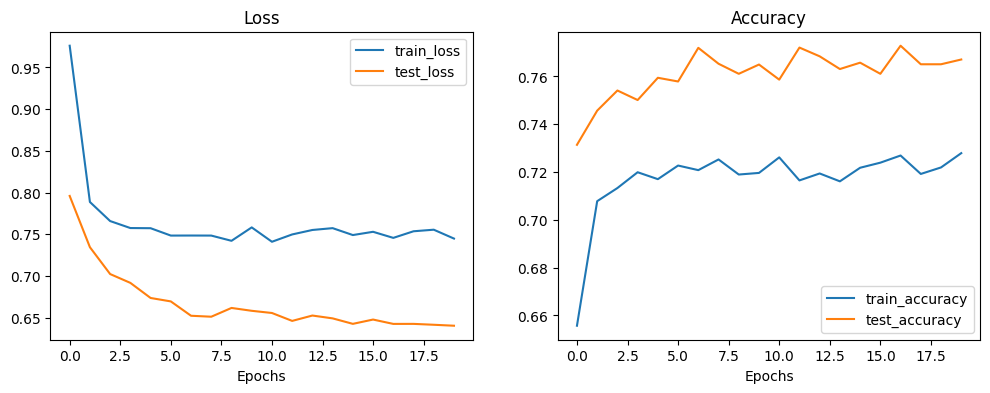

In [118]:
plot_loss_curves(effnet_model_results)

### Making predictions

In [119]:
from typing import List, Tuple
from PIL import Image

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (64, 64),
                        transform: torchvision.transforms = None,
                        device: torch.device = device):

    image = Image.open(image_path)
    
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor()
        ])

    model.eval()
    with torch.no_grad():
        transformed_image = image_transform(image).unsqueeze(dim=0) # unsqueeze added batch dimension
        target_image_pred = model(transformed_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    plt.figure()
    plt.imshow(image)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.show();

data\pred\seg_pred\4021.jpg


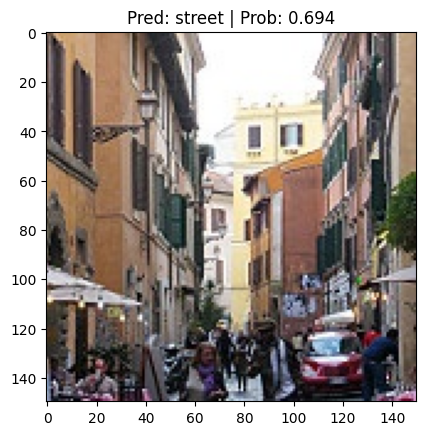

data\pred\seg_pred\12921.jpg


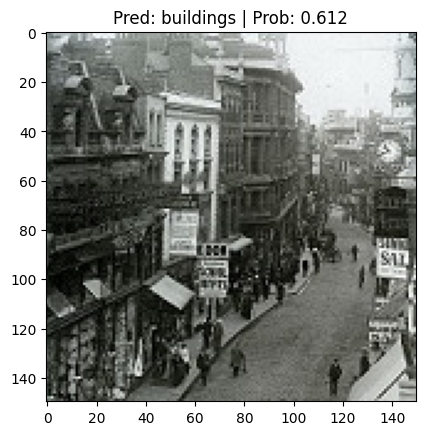

data\pred\seg_pred\10677.jpg


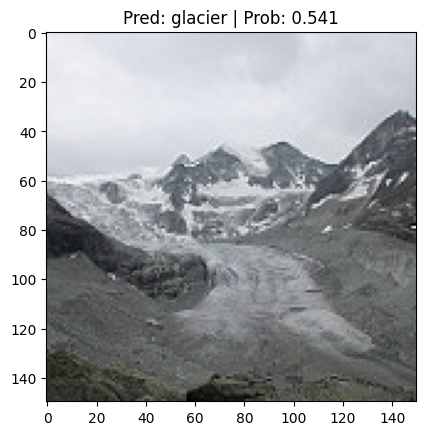

data\pred\seg_pred\6365.jpg


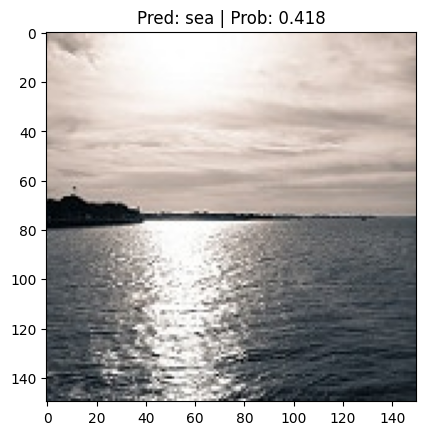

data\pred\seg_pred\169.jpg


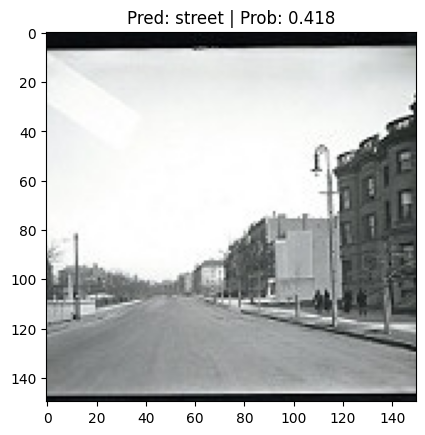

In [121]:
# Baseline model
random.seed(42)

num_images_to_plot = 5
pred_image_path_list = list(pred_image_path.glob("*.jpg"))
pred_image_path_sample = random.sample(population=pred_image_path_list,
                                       k=num_images_to_plot)

for image_path in pred_image_path_sample:
    print(image_path)
    pred_and_plot_image(model=baseline_model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(128, 128))

data\pred\seg_pred\4021.jpg


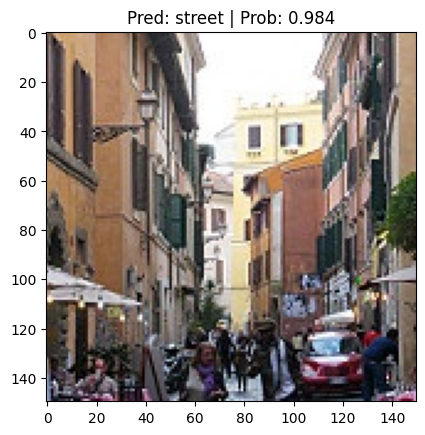

data\pred\seg_pred\12921.jpg


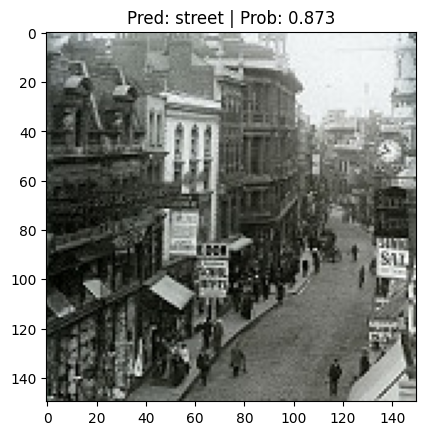

data\pred\seg_pred\10677.jpg


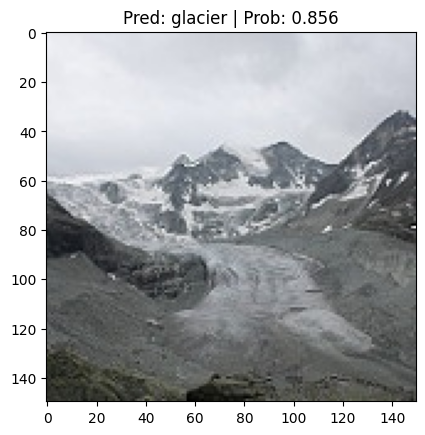

data\pred\seg_pred\6365.jpg


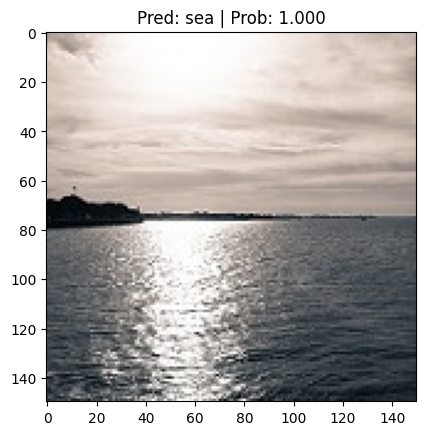

data\pred\seg_pred\169.jpg


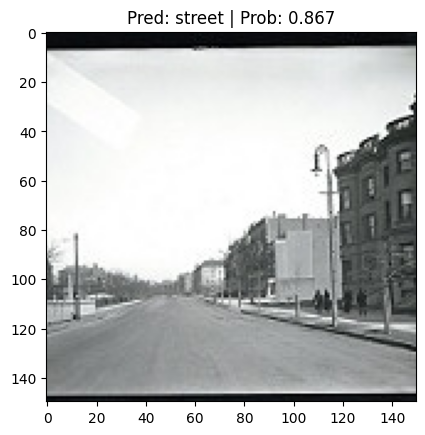

In [122]:
# ResNet50 model
random.seed(42)

num_images_to_plot = 5
pred_image_path_list = list(pred_image_path.glob("*.jpg"))
pred_image_path_sample = random.sample(population=pred_image_path_list,
                                       k=num_images_to_plot)

for image_path in pred_image_path_sample:
    print(image_path)
    pred_and_plot_image(model=resnet_model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(128, 128))